✅ 'NanumGothic' 폰트를 기본으로 설정했습니다.
=============== OCRDataset (파일 리스트 방식) 테스트 시작 ===============

[1/4] 이미지 파일 경로 리스트를 생성합니다...
✅ 1000개의 이미지 경로를 테스트에 사용합니다.

[2/4] OCRDataset 객체 생성을 (파일 리스트로) 시도합니다...
🚀 OCR 데이터셋 초기화를 시작합니다...
✅ 단어장 로드 완료. 총 글자 수: 4109
✅ 총 1000개의 이미지 파일을 처리 대상으로 설정했습니다.
✅ 객체 생성 성공!

[3/4] get_batch() 메소드를 테스트합니다...


✅ get_batch() 호출 성공!
   - 이미지 배치 형태 (N, C, H, W): (16, 1, 32, 128)
   - 라벨 배치 형태 (N, MaxLen): (16, 25)

[4/4] 배치에서 10개의 샘플을 시각화합니다...


✅ 테스트 결과 이미지를 'dataset_test_from_list.png' 파일로 저장했습니다.

=============== OCRDataset 테스트 종료 ===============


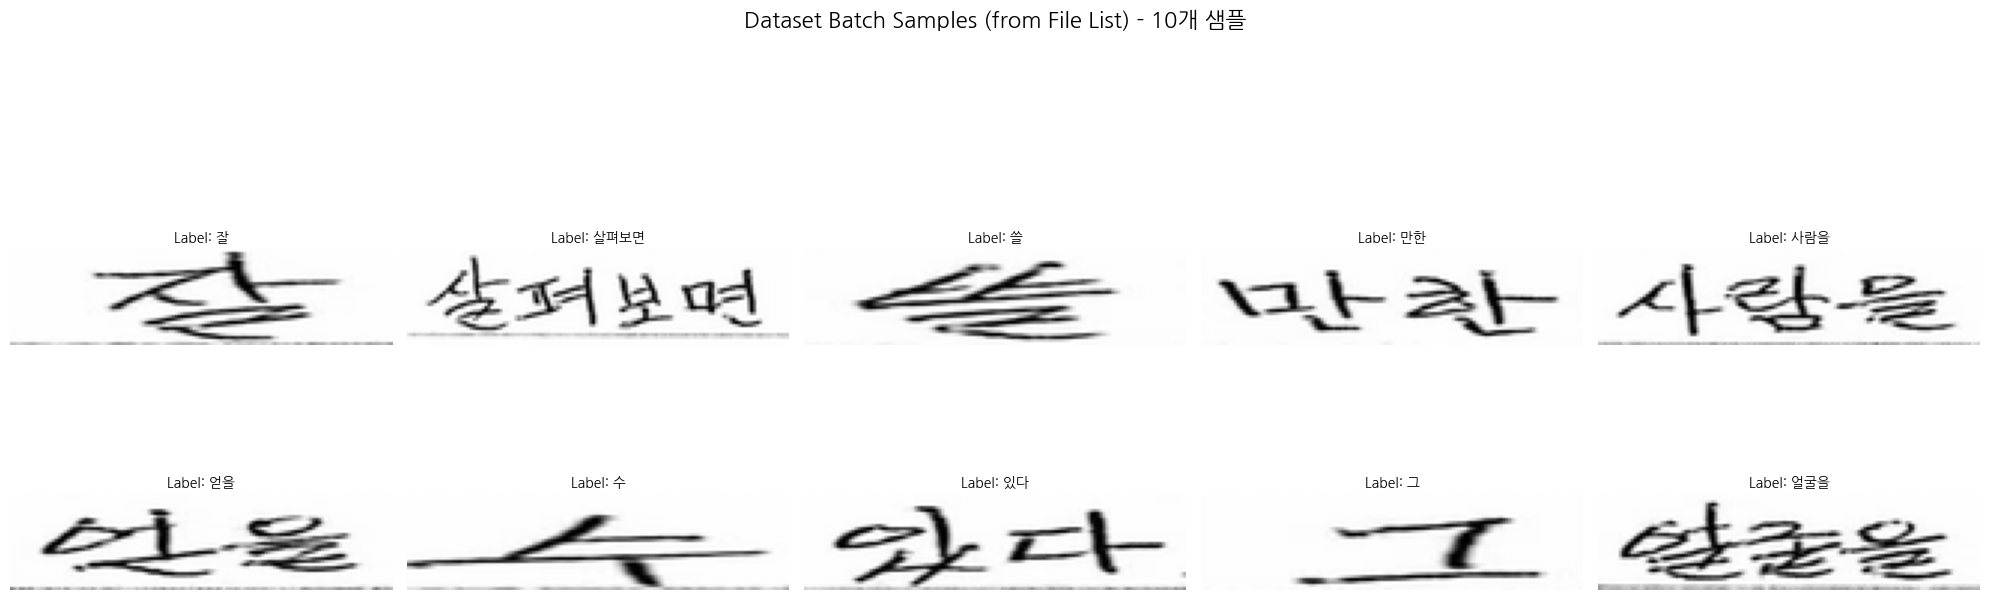

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import glob

# 폰트 관련 경고 무시
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# ---------------------------------------------------------------------------
# Matplotlib에서 한글 폰트 설정을 위한 함수
# ---------------------------------------------------------------------------
def set_korean_font():
    """Colab 환경에서 Matplotlib에 한글 폰트를 설정하고, 폰트 경로를 반환합니다."""
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

    if not os.path.exists(font_path):
        print("한글 폰트(나눔)를 설치합니다...")
        !sudo apt-get -qq -y install fonts-nanum*

        print("폰트 캐시를 재생성합니다...")
        try:
            fm._rebuild()
        except AttributeError:
            from matplotlib.font_manager import _load_fontmanager
            _load_fontmanager(try_read_cache=False)

    try:
        font_name = fm.FontProperties(fname=font_path, size=10).get_name()
        plt.rc('font', family=font_name)
        plt.rcParams['axes.unicode_minus'] = False
        print(f"✅ '{font_name}' 폰트를 기본으로 설정했습니다.")
        return font_path
    except Exception:
        print("🚨 폰트 설정에 실패했습니다. 런타임을 다시 시작하고 실행해보세요.")
        return None

# ---------------------------------------------------------------------------

# --- 경로 설정 ---
sys.path.append('/content/drive/MyDrive/DL_project')

try:
    from dataset.ocr_dataset import OCRDataset
except ImportError:
    print("🚨 오류: 'dataset/ocr_dataset.py' 파일을 찾을 수 없습니다.")
    sys.exit()

def run_test(font_path: str):
    print("=============== OCRDataset (파일 리스트 방식) 테스트 시작 ===============")

    # --- 1. 경로 정의 ---
    BASE_GDRIVE_PATH = "/content/drive/MyDrive/DL_project"
    TRAIN_IMG_PATH = os.path.join(BASE_GDRIVE_PATH, "train_images")
    TRAIN_LBL_PATH = os.path.join(BASE_GDRIVE_PATH, "train_labels")
    VOCAB_PATH = os.path.join(BASE_GDRIVE_PATH, "vocab.json")

    if not all(os.path.exists(p) for p in [TRAIN_IMG_PATH, TRAIN_LBL_PATH, VOCAB_PATH]):
        print("\n🚨 오류: 필요한 파일이나 폴더가 없습니다. 경로를 확인해주세요.")
        return

    # --- 2. 데이터셋 객체 생성 테스트 ---
    print("\n[1/4] 이미지 파일 경로 리스트를 생성합니다...")
    # glob을 사용하여 모든 이미지 파일의 전체 경로를 리스트로 만듭니다.
    image_file_list = glob.glob(os.path.join(TRAIN_IMG_PATH, '*.png'))

    # 테스트를 위해 파일 리스트의 일부만 사용 (예: 1000개)
    image_file_list = image_file_list[:1000]
    print(f"✅ {len(image_file_list)}개의 이미지 경로를 테스트에 사용합니다.")

    print("\n[2/4] OCRDataset 객체 생성을 (파일 리스트로) 시도합니다...")
    try:
        # ✨✨✨ 핵심: image_paths_or_dir에 폴더 경로 대신 파일 리스트를 전달 ✨✨✨
        dataset = OCRDataset(
            image_paths_or_dir=image_file_list,
            label_dir=TRAIN_LBL_PATH,
            vocab_path=VOCAB_PATH,
            image_size=(128, 32),
            max_label_len=25
        )
        print("✅ 객체 생성 성공!")
    except Exception as e:
        print(f"\n🚨 객체 생성 중 오류 발생: {e}")
        return

    # --- 3. get_batch 메소드 테스트 ---
    print("\n[3/4] get_batch() 메소드를 테스트합니다...")
    batch_size = 16
    try:
        x_batch, t_batch = dataset.get_batch(batch_size)
        print("✅ get_batch() 호출 성공!")
        print(f"   - 이미지 배치 형태 (N, C, H, W): {x_batch.shape}")
        print(f"   - 라벨 배치 형태 (N, MaxLen): {t_batch.shape}")
    except Exception as e:
        print(f"\n🚨 get_batch() 호출 중 오류 발생: {e}")
        return

    # --- 4. 데이터 시각화 및 라벨 확인 ---
    num_samples_to_show = 10
    print(f"\n[4/4] 배치에서 {num_samples_to_show}개의 샘플을 시각화합니다...")

    if x_batch.shape[0] >= num_samples_to_show:
        font_prop = fm.FontProperties(fname=font_path) if font_path else None

        fig, axes = plt.subplots(2, 5, figsize=(20, 8))
        fig.suptitle("Dataset Batch Samples (from File List) - 10개 샘플", fontsize=16, fontproperties=font_prop)

        for i in range(num_samples_to_show):
            image = x_batch[i]
            label_ids = t_batch[i]

            label_text = "".join(
                [dataset.id_to_char.get(id, '') for id in label_ids if id != dataset.pad_id]
            )

            ax = axes[i // 5, i % 5]
            ax.imshow(image.squeeze(), cmap='gray')
            ax.set_title(f"Label: {label_text}", fontsize=12, fontproperties=font_prop)
            ax.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        output_image_path = "dataset_test_from_list.png"
        plt.savefig(output_image_path)
        print(f"✅ 테스트 결과 이미지를 '{output_image_path}' 파일로 저장했습니다.")
    else:
        print(f"   - 경고: 배치의 샘플 수가 부족하여 시각화를 건너뜁니다.")

    print("\n=============== OCRDataset 테스트 종료 ===============")


if __name__ == '__main__':
    korean_font_path = set_korean_font()
    run_test(korean_font_path)